In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.coco as fouc
from fiftyone import ViewField as F

In [2]:
classes = [
"Waterhemp",
"MorningGlory",
"Purslane",
"SpottedSpurge",
"Carpetweed",
"Ragweed",
"Eclipta",
"PricklySida",
"PalmerAmaranth",
"Sicklepod",
"Goosegrass",
"CutleafGroundcherry",
"Horsenettle",
"Nutsedge",
"HophornbeamCopperleaf",
"Smellmelon",
"PurpleAmmannia",
"PricklyLettuce",
"HempSesbania",
"VirginiaButtonweed",
"Cocklebur"
]

In [2]:
classes_13 = [
"N/A",
"Waterhemp",
"MorningGlory",
"Purslane",
"SpottedSpurge",
"Carpetweed",
"Ragweed",
"Eclipta",
"PricklySida",
"PalmerAmaranth",
"Sicklepod",
"Goosegrass",
"CutleafGroundcherry",
"N/A"
]

In [3]:
classes_12 = [
"Waterhemp",
"MorningGlory",
"Purslane",
"SpottedSpurge",
"Carpetweed",
"Ragweed",
"Eclipta",
"PricklySida",
"PalmerAmaranth",
"Sicklepod",
"Goosegrass",
"CutleafGroundcherry"
]

In [4]:

# The directory containing the source images
image_path = "/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017"
data_path = "/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017"

# The path to the COCO labels JSON file
gt_path = "/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/annotations/instances_test2017.json"

# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    dataset_dir=image_path,
    data_path=data_path,
    labels_path=gt_path,
    #label_field = "ground_truth",
)

 100% |█████████████████| 848/848 [35.4s elapsed, 0s remaining, 23.4 samples/s]      


In [5]:
dataset.persistent = True

In [6]:
fouc.add_coco_labels(
    sample_collection = dataset,
    label_field = "ground_truth",
    labels_or_path = gt_path,
    classes = classes_13,
    label_type = "detections"
)

In [7]:
pred_path_yolo = '/home/ayina/MscThesis/DCW/YOLOv4/runs/test/exp9/best_predictions.json'

fouc.add_coco_labels(
    sample_collection = dataset,
    label_field = "predictions_yolo",
    labels_or_path = pred_path_yolo,
    classes = classes_13,
    label_type = "detections"
)

In [28]:
# add model predictions
#pred_path_detr = '/home/ayina/MscThesis/DCW/detr-main/preds/test_predictions.json'
pred_path_deform = '/home/ayina/MscThesis/DCW/deformable-detr/preds/test_predictions.json'

fouc.add_coco_labels(
    sample_collection = dataset,
    label_field = "predictions_deform",
    labels_or_path = pred_path_deform,
    classes = classes_13,
    label_type = "detections"
)

In [8]:
results_yolo = dataset.evaluate_detections(
    "predictions_yolo",
    gt_field="ground_truth",
    eval_key="eval_predictions_yolo",
    compute_mAP=True,
)

Evaluating detections...
 100% |█████████████████| 848/848 [29.2s elapsed, 0s remaining, 20.8 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 848/848 [10.4s elapsed, 0s remaining, 78.2 samples/s]      


In [52]:
print(results_yolo.mAP())

0.8935691048614026


In [29]:
results_deform = dataset.evaluate_detections(
    "predictions_deform",
    gt_field="ground_truth",
    eval_key="eval_predictions_deform",
    compute_mAP=True,
)

Evaluating detections...
 100% |█████████████████| 848/848 [4.2m elapsed, 0s remaining, 3.4 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 848/848 [41.9s elapsed, 0s remaining, 22.8 samples/s]      


In [54]:
print(results_deform.mAP())

0.864167692122789


In [50]:
counts = dataset.count_values("ground_truth.detections.label")
sorted_classes = sorted(counts, key=counts.get, reverse=True)[:12]
results_yolo.print_report(classes=sorted_classes)

                     precision    recall  f1-score   support

          Waterhemp       0.15      0.99      0.27       300
       MorningGlory       0.11      0.98      0.20       198
      SpottedSpurge       0.08      0.99      0.14       164
            Ragweed       0.08      0.99      0.15       147
           Purslane       0.08      0.95      0.15       139
         Carpetweed       0.06      0.95      0.12       128
            Eclipta       0.07      0.99      0.13       116
        PricklySida       0.05      0.99      0.09        78
     PalmerAmaranth       0.04      0.98      0.07        58
         Goosegrass       0.02      0.92      0.04        37
CutleafGroundcherry       0.01      0.96      0.03        23
          Sicklepod       0.01      1.00      0.03        19

          micro avg       0.07      0.98      0.13      1407
          macro avg       0.06      0.97      0.12      1407
       weighted avg       0.09      0.98      0.16      1407



In [32]:
counts = dataset.count_values("ground_truth.detections.label")
sorted_classes = sorted(counts, key=counts.get, reverse=True)[:12]
results.print_report(classes=sorted_classes)

                     precision    recall  f1-score   support

          Waterhemp       0.05      0.99      0.10       300
       MorningGlory       0.02      0.99      0.04       198
      SpottedSpurge       0.01      0.99      0.01       164
            Ragweed       0.04      0.97      0.08       147
           Purslane       0.03      1.00      0.06       139
         Carpetweed       0.01      0.97      0.03       128
            Eclipta       0.04      1.00      0.08       116
        PricklySida       0.02      0.99      0.03        78
     PalmerAmaranth       0.03      1.00      0.05        58
         Goosegrass       0.01      1.00      0.03        37
CutleafGroundcherry       0.00      0.96      0.01        23
          Sicklepod       0.00      1.00      0.01        19

          micro avg       0.02      0.99      0.03      1407
          macro avg       0.02      0.99      0.04      1407
       weighted avg       0.03      0.99      0.06      1407



In [38]:

high_conf_view = dataset.filter_labels("predictions_deform", F("confidence") > 0.80, only_matches=False)

In [46]:
sample = high_conf_view.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '64fd276287d57a04bb7d2ca5',
    'attributes': {},
    'tags': [],
    'label': 'Waterhemp',
    'bounding_box': [
        0.0026455026455026454,
        0.22470238095238096,
        0.656415343915344,
        0.43799603174603174,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'iscrowd': 0,
    'eval_predictions_deform': 'tp',
    'eval_predictions_deform_id': '64fd276687d57a04bb7d3224',
    'eval_predictions_deform_iou': 0.8863968489343168,
}>


In [43]:
sample = high_conf_view.first()
print(sample.predictions_deform.detections[0])

<Detection: {
    'id': '64fd276687d57a04bb7d3224',
    'attributes': {},
    'tags': [],
    'label': 'Waterhemp',
    'bounding_box': [
        0.06541427733406188,
        0.22703176831442212,
        0.5849721999395461,
        0.4356541709294395,
    ],
    'mask': None,
    'confidence': 0.92180997133255,
    'index': None,
    'eval_predictions_deform': 'tp',
    'eval_predictions_deform_id': '64fd276287d57a04bb7d2ca5',
    'eval_predictions_deform_iou': 0.8863968489343168,
}>


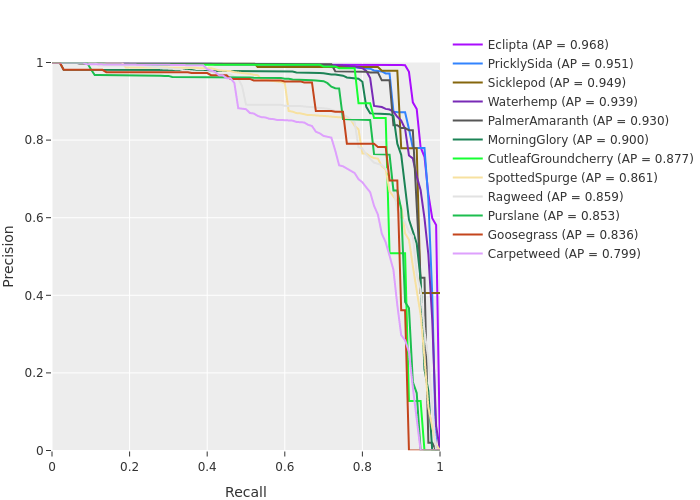

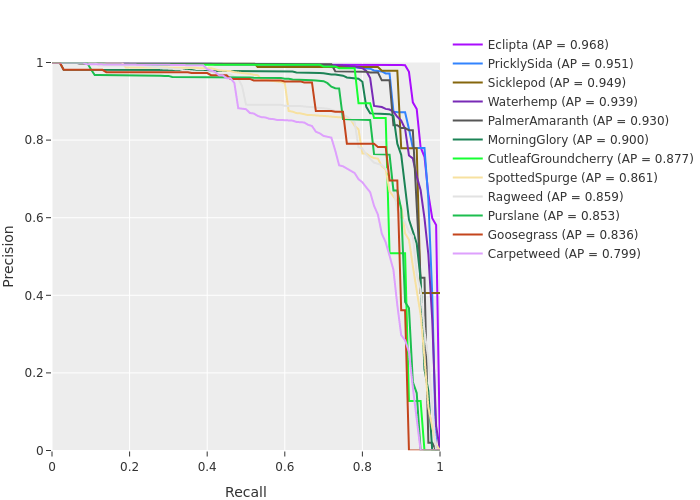

FigureWidget({
    'data': [{'customdata': array([0.98779 , 0.98438 , 0.98438 , 0.98242 , 0.98242 , 0.98242 , 0.98145 ,
                                   0.98145 , 0.98145 , 0.98096 , 0.98047 , 0.98047 , 0.98047 , 0.97998 ,
                                   0.97949 , 0.97949 , 0.979   , 0.979   , 0.979   , 0.979   , 0.978952,
                                   0.97852 , 0.97852 , 0.97852 , 0.978471, 0.977981, 0.977491, 0.97705 ,
                                   0.97705 , 0.97705 , 0.97705 , 0.977001, 0.97656 , 0.97656 , 0.976511,
                                   0.97607 , 0.97607 , 0.97607 , 0.97559 , 0.97559 , 0.97559 , 0.975541,
                                   0.975394, 0.974953, 0.97461 , 0.974561, 0.974463, 0.974071, 0.973973,
                                   0.97363 , 0.97363 , 0.97363 , 0.973581, 0.973483, 0.97314 , 0.973092,
                                   0.973044, 0.97266 , 0.97266 , 0.97266 , 0.972611, 0.972513, 0.972415,
                                   0.971

In [59]:
plot = results_yolo.plot_pr_curves(classes=classes_12)
plot.show()
plot.freeze()

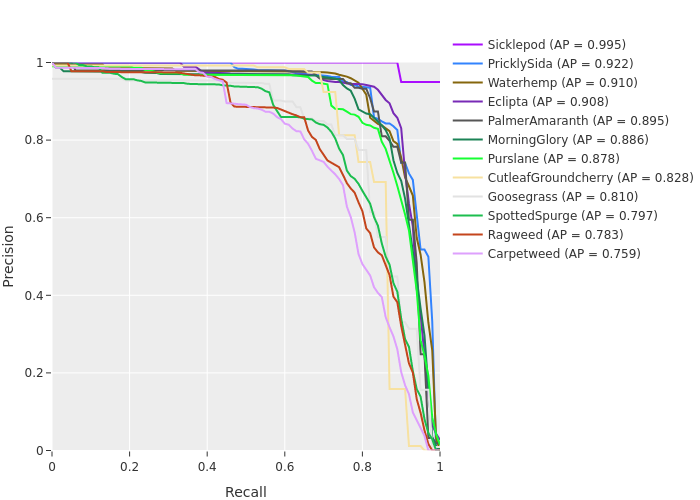

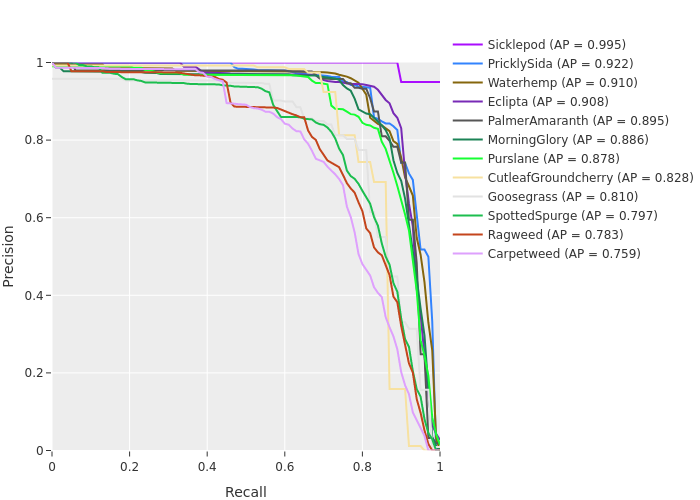

FigureWidget({
    'data': [{'customdata': array([0.95497602, 0.95497602, 0.95497602, 0.95497602, 0.95497602, 0.95497602,
                                   0.95172542, 0.95172542, 0.95172542, 0.95172542, 0.95172542, 0.95112407,
                                   0.95112407, 0.95112407, 0.95112407, 0.95112407, 0.94920629, 0.94920629,
                                   0.94920629, 0.94920629, 0.94920629, 0.94920629, 0.94651014, 0.94651014,
                                   0.94651014, 0.94651014, 0.94651014, 0.94527513, 0.94527513, 0.94527513,
                                   0.94527513, 0.94527513, 0.94495583, 0.94495583, 0.94495583, 0.94495583,
                                   0.94495583, 0.94489735, 0.94489735, 0.94489735, 0.94489735, 0.94489735,
                                   0.94489735, 0.94274384, 0.94274384, 0.94274384, 0.94274384, 0.94274384,
                                   0.94195497, 0.94195497, 0.94195497, 0.94195497, 0.94195497, 0.94114935,
                      

In [62]:
plot = results_deform.plot_pr_curves(classes=classes_12)
plot.show()
plot.freeze()

In [10]:
session = fo.launch_app(dataset, auto=False)  # port=YYYY
session.open_tab()

Session launched. Run `session.show()` to open the App in a cell output.


<IPython.core.display.Javascript object>

#### Print Yolo False Positive Paths

In [33]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_yolo", (
            (F("confidence") > 0.9)
            & (F("eval_predictions_yolo") == "fp")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [37]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{'CutleafGroundcherry': 2, 'PricklySida': 1, 'Waterhemp': 9, 'SpottedSpurge': 5, 'Carpetweed': 16, 'Purslane': 4, 'Eclipta': 4, 'Ragweed': 2, 'MorningGlory': 3}


In [35]:
for i in complex_view:
    print(i.filepath)

/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000023.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000054.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000162.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000245.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000274.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000338.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000533.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000600.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000612.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000665.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO

#### Print Yolo False Negative Paths

In [40]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_yolo", (
            (F("confidence") > 0.8)
            & (F("eval_predictions_yolo") == "fn")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [41]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{}


#### Print Yolo True Positive Paths

In [56]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_yolo", (
            (F("confidence") > 0.983)
            & (F("eval_predictions_yolo") == "tp")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [57]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{'PalmerAmaranth': 4, 'Waterhemp': 2, 'Carpetweed': 4, 'Eclipta': 5}


In [59]:
for i in complex_view:
    print(i.filepath)

/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000115.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000299.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000345.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000373.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000656.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000714.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000781.jpg


#### Print DEFORM False Positive Paths

In [82]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_deform", (
            (F("confidence") > 0.9)
            & (F("eval_predictions_deform") == "fp")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [83]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{'Waterhemp': 2, 'Purslane': 2, 'Eclipta': 4, 'MorningGlory': 4}


In [84]:
for i in sample_many:
    print(i.filepath)

/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000011.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000012.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000013.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000014.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000015.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000016.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000017.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000018.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000019.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000020.jpg


#### Print DEFORM False Negative Paths

In [74]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_deform", (
            (F("confidence") > 0.8)
            & (F("eval_predictions_deform") == "fn")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [75]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{}


#### Print DEFORM True Positive Paths

In [85]:
complex_view = (
    dataset
    .filter_labels(
        "predictions_deform", (
            (F("confidence") > 0.95)
            & (F("eval_predictions_deform") == "tp")
           # & (F("label").is_in(["person", "dog"]))
        )
    )
)

In [86]:
counts = complex_view.count_values("ground_truth.detections.label")
print(counts)

{'CutleafGroundcherry': 1, 'PalmerAmaranth': 1, 'PricklySida': 1, 'Waterhemp': 6, 'Carpetweed': 3, 'SpottedSpurge': 5, 'Sicklepod': 3, 'Ragweed': 92, 'Eclipta': 4}


In [87]:
for i in sample_many:
    print(i.filepath)

/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000011.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000012.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000013.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000014.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000015.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000016.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000017.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000018.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000019.jpg
/home/ayina/MscThesis/DCW/datasets/Dataset_final/DATA_0_COCO_format/test2017/000000000020.jpg
